In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##This function modifies the global matplotlib.units.registry dictionary. Pandas adds custom converters 
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
df=pd.read_csv('C:/Users/Asus/Downloads/ice_cream.csv')

In [8]:
df1=df

In [9]:
df1.head(7)

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
5,1972-06-01,100.5960
6,1972-07-01,100.1263


In [11]:
df1.rename(columns={'DATE':'date','IPN31152N':'Produced'},inplace=True)

In [12]:
df1.head()

,date,Produced
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      577 non-null    object 
 1   Produced  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [16]:
##Convert date column to datetime column
df1['date']=pd.to_datetime(df1.date)

In [17]:
##Set date as index
df1.set_index('date',inplace=True)

In [18]:
df1.head()

,Produced
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [19]:
##getting data from 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df2=df1[start_date:]

In [20]:
df2.head()

,Produced
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


Text(0, 0.5, 'Production')

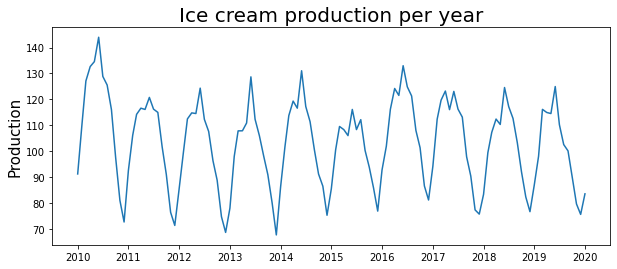

In [24]:
plt.figure(figsize=(10,4))
plt.plot(df2.Produced)
plt.title('Ice cream production per year',fontsize=20)
plt.ylabel('Production',fontsize=15)


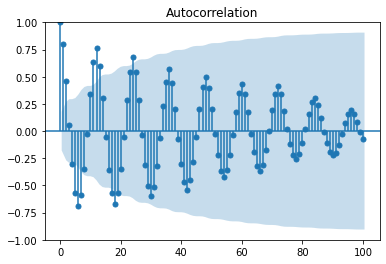

In [30]:
acf=plot_acf(df2.Produced,lags=100)

# Based on the decaying nature of the ACF graph we are likely dealing with an auto regressive process

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


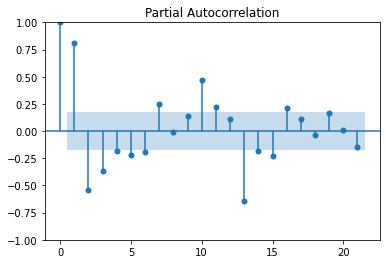

In [28]:
pacf=plot_pacf(df2.Produced)

# Based on the PACF we should start with an auto regressive model with lages 1,2,3,11,14

# Using Staock data

In [33]:
import yfinance as yf

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [32]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/cd/54/9c03f5c83dec8d611f33f5b0e796eed718cf062b2cf5171188b923ae48ad/lxml-5.1.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2022.5 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
Note: you may need to restart

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.22.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.22.0 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.22.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/97/df/760e65e4eaa2d2e0962855ad8cd5f964919281bc58ece159420db8ee05d4/frozendict-2.4.0-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 2.9/2.9 MB 167.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 112.2/112.2 kB 344.4 kB/s eta 0:00:00
   ---------------------------------------- 72.4/72.4 kB ? eta 0:00:00
   ---------------------------------------- 3.9/3.9 MB 871.7 kB/s eta 0:00:00
   ---------------------------------------- 505.5/505.5 kB 2.1 MB/s eta 0:00:00
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Create

In [34]:
tickerSymbol='SPY'

In [35]:
tickerdata=yf.Ticker(tickerSymbol)

In [36]:
tickerDF=tickerdata.history(period='id',start='2015-1-1',end='2023-12-12')

In [37]:
tickerDF=tickerDF[['Close']]

In [38]:
tickerDF.head()

,Close
Date,
2015-01-02 00:00:00-05:00,174.806778
2015-01-05 00:00:00-05:00,171.649872
2015-01-06 00:00:00-05:00,170.033066
2015-01-07 00:00:00-05:00,172.151855
2015-01-08 00:00:00-05:00,175.206696


In [39]:
tickerDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2251 entries, 2015-01-02 00:00:00-05:00 to 2023-12-11 00:00:00-05:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2251 non-null   float64
dtypes: float64(1)
memory usage: 35.2 KB


Text(0, 0.5, 'Price')

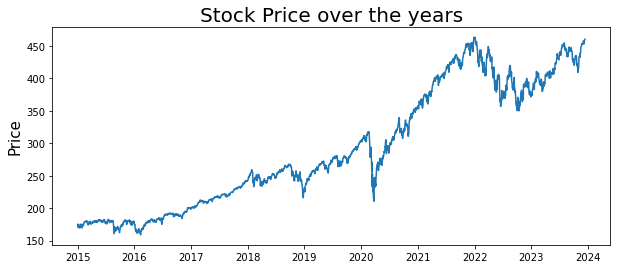

In [42]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.Close)
plt.title('Stock Price over the years',fontsize=20)
plt.ylabel('Price',fontsize=15)

In [46]:
##The above model is not stationary, so we will take the differnece between the present and its previous closing value
#take first difference tommorow-today 
first_df=tickerDF.Close.values[1:]-tickerDF.Close.values[:-1]
first_df=np.concatenate([first_df,[0]])

In [51]:

tickerDF['FirstDifference']=first_df

In [52]:
tickerDF.head()

,Close,First Difference,FirstDifference
Date,,,
2015-01-02 00:00:00-05:00,174.806778,-3.156906,-3.156906
2015-01-05 00:00:00-05:00,171.649872,-1.616806,-1.616806
2015-01-06 00:00:00-05:00,170.033066,2.118790,2.118790
2015-01-07 00:00:00-05:00,172.151855,3.054840,3.054840
2015-01-08 00:00:00-05:00,175.206696,-1.404022,-1.404022


Text(0.5, 1.0, 'First difference over time (SPY)')

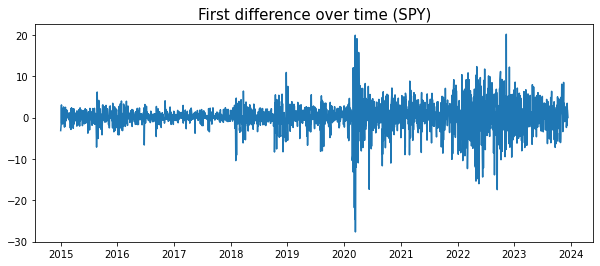

In [54]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.FirstDifference)
plt.title('First difference over time (%s)'%tickerSymbol,fontsize=15)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


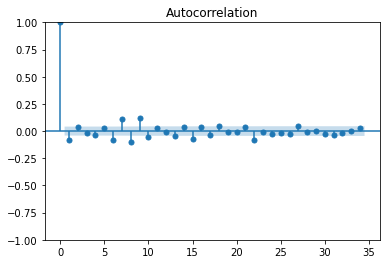

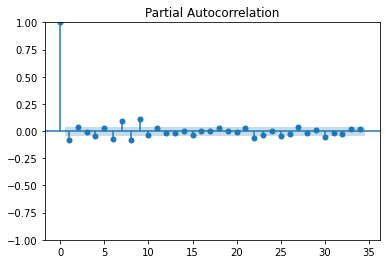

In [55]:
acf_1=plot_acf(tickerDF.FirstDifference)
pacf_1=plot_pacf(tickerDF.FirstDifference)

# Here ACF and PACF does not help in identifying the lags from which to start Auto Regression process